In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 17022903.05it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269169.05it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5037135.64it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22657163.69it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


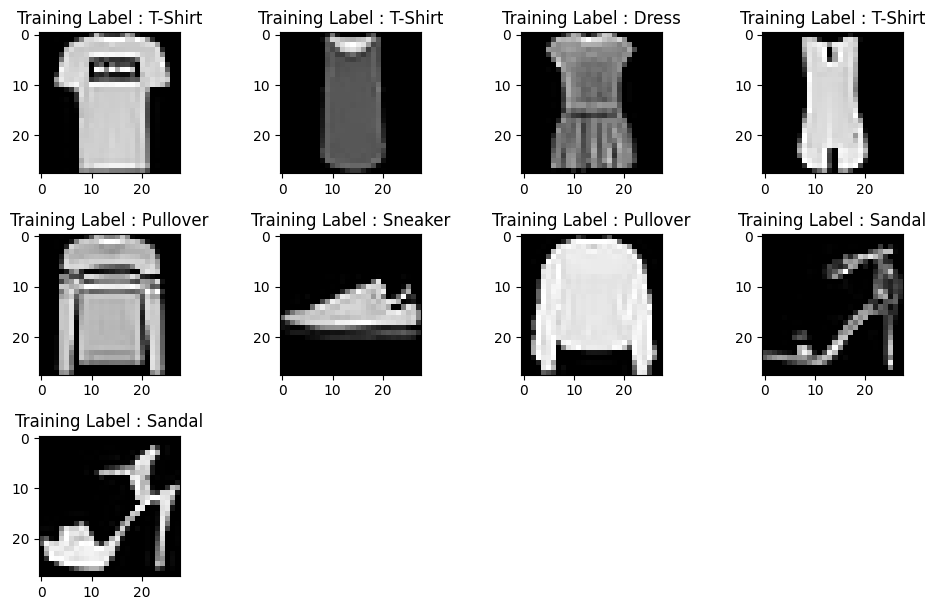

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
## Define the model
################ Your code ############
model1 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 128, device=device),
  nn.ReLU(),
  nn.Linear(128, 64, device=device),
  nn.ReLU(),
  nn.Linear(64, out_size, device=device),
  nn.Softmax()
)
#######################################

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=1e-3, momentum=0.9)
#######################################

In [ ]:
print(model1)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
  (6): Softmax(dim=None)
)


In [ ]:
## Train your model
epochs = 10
train_losses = []
val_losses = []
model1 = model1.to(device)
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1).to(device)
    labels = labels.to(device)
    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model1(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader:
      images = images.to(device)
      labels = labels.to(device)
      with torch.no_grad():
        output = model1(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses.append(running_loss_train)
    val_losses.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader)}        Validation loss: {running_loss_val/len(testloader)}")

Training loss: 2.1544796725326        Validation loss: 1.9143622399895055
Training loss: 1.8358396756877777        Validation loss: 1.7998434327969886
Training loss: 1.7723155261865302        Validation loss: 1.7529474656293347
Training loss: 1.722243175959028        Validation loss: 1.7101392540962073
Training loss: 1.695470582828847        Validation loss: 1.6922344956428381
Training loss: 1.6837153115760544        Validation loss: 1.6851690908905808
Training loss: 1.6760718113323774        Validation loss: 1.6801176838054779
Training loss: 1.670705888825439        Validation loss: 1.6742545442216714
Training loss: 1.6664056634343762        Validation loss: 1.6733230329622888
Training loss: 1.6628497222593344        Validation loss: 1.6673395671662252


In [ ]:
!pip install d2l==0.17.0

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


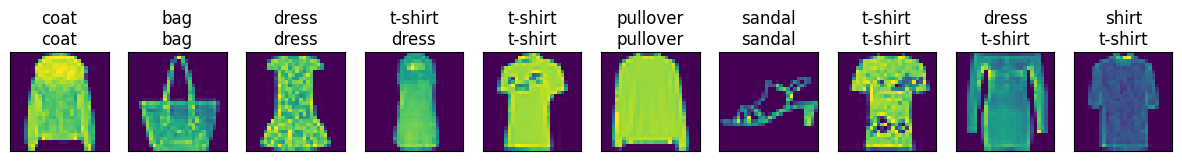

In [ ]:
## Test your model
from d2l import torch as d2l
model = model1.to('cpu')
d2l.predict_ch3(model1,testloader,n = 10)

In [ ]:
accuracy_test = 0
for images,labels in testloader:
  output = model1(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test += torch.sum(output == labels).item()
accuracy_train = 0
for images,labels in trainloader:
  output = model1(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test / 10000}")
print(f"Train Accuracy: {accuracy_train / 60000}")

Accuracy: 0.8012


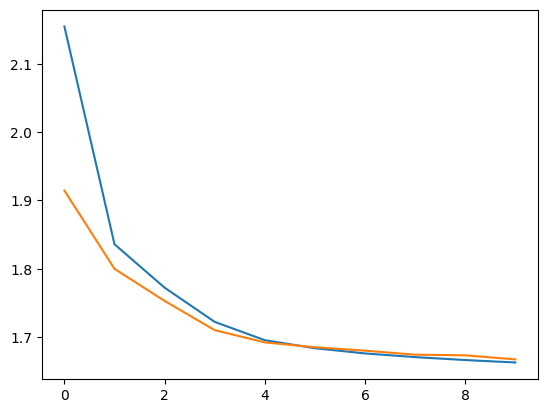

In [ ]:
train_losses = np.array(train_losses)/len(trainloader)
val_losses = np.array(val_losses)/len(testloader)
plt.plot(range(epochs), train_losses)
plt.plot(range(epochs), val_losses)

## Part b

In [ ]:
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [ ]:
train_losses = []
val_losses = []

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-1)
#######################################

In [ ]:
## Train your model
epochs = 60
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader:
      with torch.no_grad():
        output = model(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses.append(running_loss_train)
    val_losses.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader)}        Validation loss: {running_loss_val/len(testloader)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training loss: 1.913507561693822        Validation loss: 1.6901818863145865
Training loss: 1.677571046835324        Validation loss: 1.6957905482334696
Training loss: 1.6580926489982524        Validation loss: 1.662549287650236
Training loss: 1.6507503624155577        Validation loss: 1.653655869945599
Training loss: 1.6431590674528436        Validation loss: 1.6541957467984243
Training loss: 1.6389042834229053        Validation loss: 1.6468696897956216
Training loss: 1.633846620761001        Validation loss: 1.6493811311235853
Training loss: 1.6305908032063483        Validation loss: 1.6613775096881163
Training loss: 1.6286619754234102        Validation loss: 1.6463313884795852
Training loss: 1.6261840082689134        Validation loss: 1.643729717868149
Training loss: 1.6235162169694393        Validation loss: 1.663298609909738
Training loss: 1.6220166326077508        Validation loss: 1.634768229381294
Training loss: 1.6209726509000701        Validation loss: 1.6336335619543767
Trainin

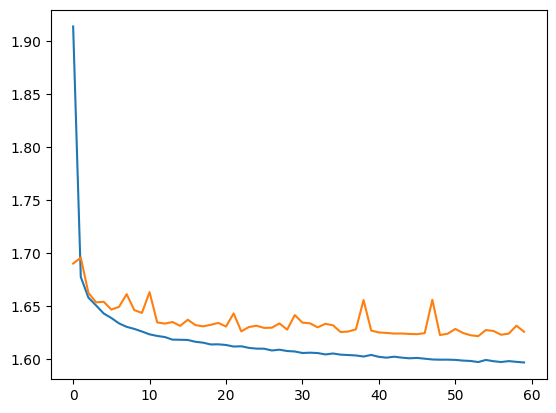

In [ ]:
train_losses = np.array(train_losses)/len(trainloader)
val_losses = np.array(val_losses)/len(testloader)
plt.plot(range(epochs), train_losses)
plt.plot(range(epochs), val_losses)

In [ ]:
accuracy_test = 0
for images,labels in testloader:
  output = model(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test += torch.sum(output == labels).item()
accuracy_train = 0
for images,labels in trainloader:
  output = model(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test / 10000}")
print(f"Train Accuracy: {accuracy_train / 60000}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 0.8348
Train Accuracy: 0.85815


## Part c

In [ ]:
from torchvision.transforms import v2
import torchvision.transforms as transforms

In [ ]:
def custom_color_jitter(img):
    if random.random() < 0.5:  # Apply with a probability of 50%
        return transforms.ColorJitter(brightness=0.4)(img)
    else:
        return img

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(custom_color_jitter),
    v2.RandomHorizontalFlip(p=0.5), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset2 = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size= 64, shuffle=True)

# Download and load test data
testset2 = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader2 = torch.utils.data.DataLoader(testset2, batch_size= 64, shuffle=True)

In [ ]:
model2 = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [ ]:
train_losses = []
val_losses = []

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(), lr=1e-1)
#######################################

In [ ]:
## Train your model
epochs = 40
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader2:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model2(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader2:
      with torch.no_grad():
        output = model2(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses.append(running_loss_train)
    val_losses.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader2)}        Validation loss: {running_loss_val/len(testloader2)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training loss: 1.9383783780181332        Validation loss: 1.7204029643611543
Training loss: 1.6882575717307866        Validation loss: 1.6754469188155643
Training loss: 1.666757337192991        Validation loss: 1.6645523560274937
Training loss: 1.6577617658226729        Validation loss: 1.6603010999169319
Training loss: 1.6505183784692272        Validation loss: 1.6524167637916127
Training loss: 1.6471532564173375        Validation loss: 1.6517337856778673
Training loss: 1.64117811165893        Validation loss: 1.6467296090095667
Training loss: 1.639337720266029        Validation loss: 1.6476255116189362
Training loss: 1.637469869432673        Validation loss: 1.6560642924278406
Training loss: 1.6347534368033094        Validation loss: 1.6520106838007642
Training loss: 1.633887395548668        Validation loss: 1.6412439930970502
Training loss: 1.6326815102146124        Validation loss: 1.6412812327123751
Training loss: 1.6301064112547363        Validation loss: 1.6420559799595245
Train

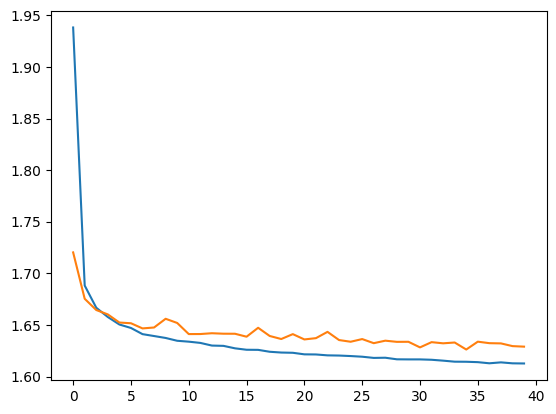

In [ ]:
train_losses_plot = np.array(train_losses)/len(trainloader2)
val_losses_plot = np.array(val_losses)/len(testloader2)
plt.plot(range(epochs), train_losses_plot)
plt.plot(range(epochs), val_losses_plot)

In [ ]:
accuracy_test2 = 0
for images,labels in testloader2:
  output = model2(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test2 += torch.sum(output == labels).item()
accuracy_train2 = 0
for images,labels in trainloader2:
  output = model2(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train2 += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test2 / 10000}")
print(f"Train Accuracy: {accuracy_train2 / 60000}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 0.8307
Train Accuracy: 0.8522666666666666


## Regularization

In [ ]:
!rm -r ./data

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset_reg = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader_reg = torch.utils.data.DataLoader(trainset_reg, batch_size= 64, shuffle=True)

# Download and load test data
testset_reg = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader_reg = torch.utils.data.DataLoader(testset_reg, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:04<00:00, 6576407.10it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211076.13it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3847365.27it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9363519.94it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
model_reg = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [ ]:
train_losses_reg = []
val_losses_reg = []

In [ ]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_reg.parameters(), lr=1e-1)
#######################################

In [ ]:
## Train your model
epochs = 30
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader_reg:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()
    l2_lambda = 0.005
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model_reg.parameters())

    loss = loss + l2_lambda * l2_norm
    # forward pass
    ################ Your code ############
    output = model_reg(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader_reg:
      with torch.no_grad():
        output = model_reg(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses_reg.append(running_loss_train)
    val_losses_reg.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader_reg)}        Validation loss: {running_loss_val/len(testloader_reg)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training loss: 1.606268716010966        Validation loss: 1.6286720386735953
Training loss: 1.6051737028144315        Validation loss: 1.6256514590257292
Training loss: 1.605478779212244        Validation loss: 1.627629922453765
Training loss: 1.6047778255395544        Validation loss: 1.6279177437922
Training loss: 1.6038470451257376        Validation loss: 1.6271123681098791
Training loss: 1.6035597490857658        Validation loss: 1.6452616840411143
Training loss: 1.6042160511271024        Validation loss: 1.6256641058405494
Training loss: 1.6033746264636644        Validation loss: 1.6265752793876989
Training loss: 1.602904795202365        Validation loss: 1.632790924637181
Training loss: 1.6029691837235553        Validation loss: 1.6268271974697235
Training loss: 1.6017281277093298        Validation loss: 1.6218902966019455
Training loss: 1.5984283193850568        Validation loss: 1.602877646494823
Training loss: 1.5736213386185895        Validation loss: 1.6046288780346039
Training

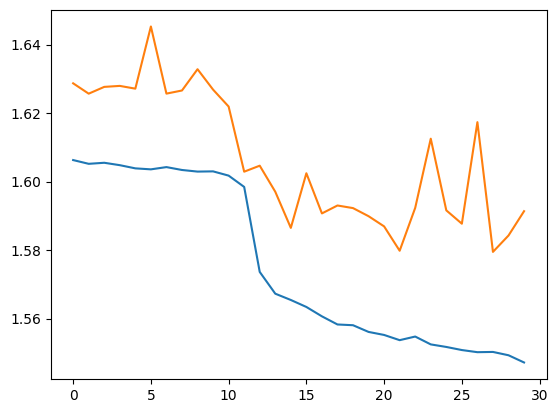

In [ ]:
train_losses_reg_plot = np.array(train_losses_reg)/len(trainloader_reg)
val_losses_reg_plot = np.array(val_losses_reg)/len(testloader_reg)
plt.plot(range(epochs), train_losses_reg_plot)
plt.plot(range(epochs), val_losses_reg_plot)

In [54]:
accuracy_test_reg = 0
for images,labels in testloader_reg:
  output = model_reg(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test_reg += torch.sum(output == labels).item()
accuracy_train_reg = 0
for images,labels in trainloader_reg:
  output = model_reg(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train_reg += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test_reg / 10000}")
print(f"Train Accuracy: {accuracy_train_reg / 60000}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Test Accuracy: 0.8695
Train Accuracy: 0.90645


## Data augmentation, Regularization, Dropout

In [48]:
!rm -r ./data

In [43]:
def custom_color_jitter(img):
    if random.random() < 0.5:  # Apply with a probability of 50%
        return transforms.ColorJitter(brightness=0.4)(img)
    else:
        return img

In [44]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(custom_color_jitter),
    v2.RandomHorizontalFlip(p=0.5), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset_comb = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader_comb = torch.utils.data.DataLoader(trainset_comb, batch_size= 64, shuffle=True)

# Download and load test data
testset_comb = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader_comb = torch.utils.data.DataLoader(testset_comb, batch_size= 64, shuffle=True)

In [50]:
model_comb = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Dropout(p=0.2),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [51]:
train_losses_comb = []
val_losses_comb = []

In [52]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_comb.parameters(), lr=1e-1)
#######################################

In [53]:
## Train your model
epochs = 30
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader_comb:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()
    l2_lambda = 0.005
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model_comb.parameters())

    loss = loss + l2_lambda * l2_norm
    # forward pass
    ################ Your code ############
    output = model_comb(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader_comb:
      with torch.no_grad():
        output = model_comb(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses_comb.append(running_loss_train)
    val_losses_comb.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader_comb)}        Validation loss: {running_loss_val/len(testloader_comb)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training loss: 1.951105082848433        Validation loss: 1.840076803401777
Training loss: 1.6875010876259062        Validation loss: 1.6788037635718183
Training loss: 1.6662583507454471        Validation loss: 1.6752956612094951
Training loss: 1.6576336938689258        Validation loss: 1.6587569440246388
Training loss: 1.6498400360536474        Validation loss: 1.650778097711551
Training loss: 1.6472234568362043        Validation loss: 1.6722140327380721
Training loss: 1.6430247485764753        Validation loss: 1.6506402955693045
Training loss: 1.6410331381663585        Validation loss: 1.6582337762140165
Training loss: 1.6368840413052899        Validation loss: 1.6645204254016754
Training loss: 1.6356879817143177        Validation loss: 1.6478609104824673
Training loss: 1.6333671531189224        Validation loss: 1.644582828139044
Training loss: 1.6325793516661313        Validation loss: 1.6459748091971038
Training loss: 1.6298669846073142        Validation loss: 1.6406133197675086
Tra

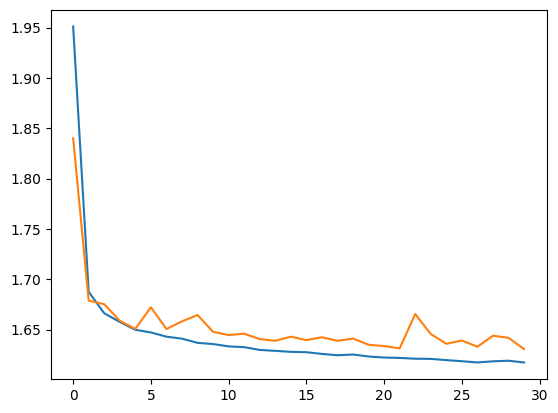

In [55]:
train_losses_comb_plot = np.array(train_losses_comb)/len(trainloader_comb)
val_losses_comb_plot = np.array(val_losses_comb)/len(testloader_comb)
plt.plot(range(epochs), train_losses_comb_plot)
plt.plot(range(epochs), val_losses_comb_plot)

In [56]:
accuracy_test_comb = 0
for images,labels in testloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test_comb += torch.sum(output == labels).item()
accuracy_train_comb = 0
for images,labels in trainloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train_comb += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test_comb / 10000}")
print(f"Train Accuracy: {accuracy_train_comb / 60000}")

Test Accuracy: 0.8285
Train Accuracy: 0.8493166666666667


## Data augmentation, Regularization

In [57]:
def custom_color_jitter(img):
    if random.random() < 0.5:  # Apply with a probability of 50%
        return transforms.ColorJitter(brightness=0.4)(img)
    else:
        return img

In [58]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(custom_color_jitter),
    v2.RandomHorizontalFlip(p=0.5), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset_comb = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader_comb = torch.utils.data.DataLoader(trainset_comb, batch_size= 64, shuffle=True)

# Download and load test data
testset_comb = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader_comb = torch.utils.data.DataLoader(testset_comb, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 13347844.14it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 210174.86it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3863041.42it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4297825.83it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [59]:
model_comb = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [60]:
train_losses_comb = []
val_losses_comb = []

In [61]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_comb.parameters(), lr=1e-1)
#######################################

In [62]:
## Train your model
epochs = 30
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader_comb:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()
    l2_lambda = 0.005
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model_comb.parameters())

    loss = loss + l2_lambda * l2_norm
    # forward pass
    ################ Your code ############
    output = model_comb(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader_comb:
      with torch.no_grad():
        output = model_comb(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses_comb.append(running_loss_train)
    val_losses_comb.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader_comb)}        Validation loss: {running_loss_val/len(testloader_comb)}")

Training loss: 1.9482129006497642        Validation loss: 1.736380372837091
Training loss: 1.6879222418453648        Validation loss: 1.6956471948866632
Training loss: 1.665698952639281        Validation loss: 1.668982110965024
Training loss: 1.656162375707362        Validation loss: 1.7006050469769034
Training loss: 1.6512118144584362        Validation loss: 1.6533176777469125
Training loss: 1.6465877097552772        Validation loss: 1.6642735740941041
Training loss: 1.6435496240282363        Validation loss: 1.6541504799180728
Training loss: 1.6398727856973596        Validation loss: 1.6448204517364502
Training loss: 1.6381046968990807        Validation loss: 1.6472865996087434
Training loss: 1.6359236497106329        Validation loss: 1.6484203551225602
Training loss: 1.6344142262615375        Validation loss: 1.6439733444505436
Training loss: 1.6331900946621194        Validation loss: 1.6460623923380664
Training loss: 1.6313913699660474        Validation loss: 1.6555359325591166
Tra

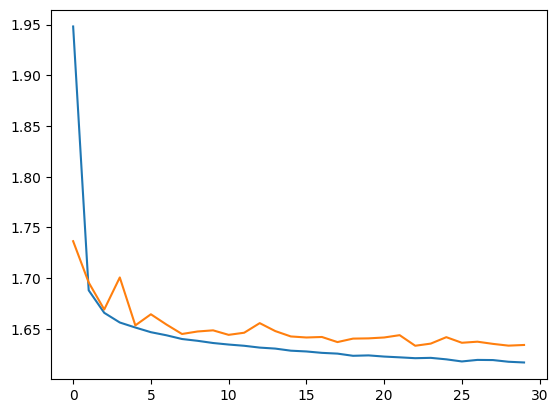

In [63]:
train_losses_comb_plot = np.array(train_losses_comb)/len(trainloader_comb)
val_losses_comb_plot = np.array(val_losses_comb)/len(testloader_comb)
plt.plot(range(epochs), train_losses_comb_plot)
plt.plot(range(epochs), val_losses_comb_plot)

In [64]:
accuracy_test_comb = 0
for images,labels in testloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test_comb += torch.sum(output == labels).item()
accuracy_train_comb = 0
for images,labels in trainloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train_comb += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test_comb / 10000}")
print(f"Train Accuracy: {accuracy_train_comb / 60000}")

Test Accuracy: 0.8282
Train Accuracy: 0.8462166666666666


## Regularization, Dropout

In [65]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset_comb = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader_comb = torch.utils.data.DataLoader(trainset_comb, batch_size= 64, shuffle=True)

# Download and load test data
testset_comb = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader_comb = torch.utils.data.DataLoader(testset_comb, batch_size= 64, shuffle=True)

In [66]:
model_comb = nn.Sequential(
  nn.Flatten(),
  nn.Linear(input_size, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Linear(512, 512),
  nn.ReLU(),
  nn.Dropout(0.2),
  nn.Linear(512, out_size),
  nn.Softmax()
)

In [67]:
train_losses_comb = []
val_losses_comb = []

In [68]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_comb.parameters(), lr=1e-1)
#######################################

In [69]:
## Train your model
epochs = 30
for e in range(epochs):
  running_loss_train = 0
  for images, labels in trainloader_comb:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()
    l2_lambda = 0.005
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model_comb.parameters())

    loss = loss + l2_lambda * l2_norm
    # forward pass
    ################ Your code ############
    output = model_comb(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss_train = running_loss_train+loss.item()
  else:
    running_loss_val = 0
    for images, labels in testloader_comb:
      with torch.no_grad():
        output = model_comb(images)
        loss = criterion(output, labels)
        running_loss_val += loss.item()
    train_losses_comb.append(running_loss_train)
    val_losses_comb.append(running_loss_val)
    print(f"Training loss: {running_loss_train/len(trainloader_comb)}        Validation loss: {running_loss_val/len(testloader_comb)}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Training loss: 1.9280371074991693        Validation loss: 1.7033025087065
Training loss: 1.6775487976541905        Validation loss: 1.6623229608414278
Training loss: 1.6578579133253362        Validation loss: 1.6541408877463857
Training loss: 1.649199100953938        Validation loss: 1.6564278207766783
Training loss: 1.641646765569634        Validation loss: 1.6476290036158956
Training loss: 1.6382826212118429        Validation loss: 1.6441450156983297
Training loss: 1.6353297444548942        Validation loss: 1.6506146974624343
Training loss: 1.6311274132748912        Validation loss: 1.6499349357216222
Training loss: 1.628352073591147        Validation loss: 1.6429331515245378
Training loss: 1.6262788811980535        Validation loss: 1.6399094337111066
Training loss: 1.623176170437575        Validation loss: 1.6383578298957484
Training loss: 1.6227185072929367        Validation loss: 1.636701859486331
Training loss: 1.6205602330185458        Validation loss: 1.6358922309936232
Trainin

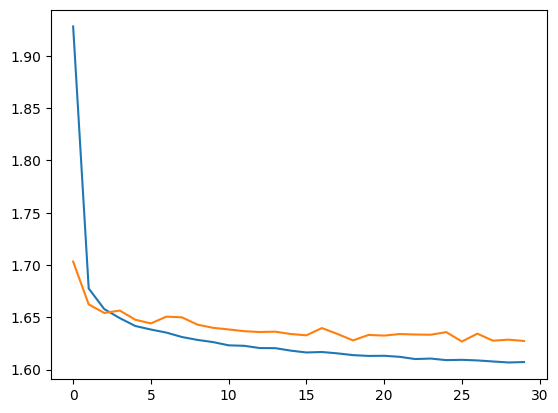

In [70]:
train_losses_comb_plot = np.array(train_losses_comb)/len(trainloader_comb)
val_losses_comb_plot = np.array(val_losses_comb)/len(testloader_comb)
plt.plot(range(epochs), train_losses_comb_plot)
plt.plot(range(epochs), val_losses_comb_plot)

In [71]:
accuracy_test_comb = 0
for images,labels in testloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_test_comb += torch.sum(output == labels).item()
accuracy_train_comb = 0
for images,labels in trainloader_comb:
  output = model_comb(images)
  output = torch.argmax(output, axis=-1)
  accuracy_train_comb += torch.sum(output == labels).item()
print(f"Test Accuracy: {accuracy_test_comb / 10000}")
print(f"Train Accuracy: {accuracy_train_comb / 60000}")

Test Accuracy: 0.8332
Train Accuracy: 0.8548666666666667
